## AutoRegressive Model
* Japan population data
* from 2000-10-01 to 2020-09-01
https://www.stat.go.jp/english/data/jinsui/2.html

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from statsmodels.tsa.ar_model import ar_select_order, AutoReg
# Load specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots
from pmdarima import auto_arima                 


In [2]:
df = pd.read_csv('Data/JapanPopulation2000.10_2020_9.csv', index_col='Month', parse_dates=True, skiprows=[1,2,3])
df.index.freq = 'MS'
df.head()

,PopEst
Month,
2001-01-01,125643
2001-02-01,125727
2001-03-01,125651
2001-04-01,125722
2001-05-01,125665


In [3]:
df.tail()

,PopEst
Month,
2020-05-01,123551
2020-06-01,123521
2020-07-01,123503
2020-08-01,123484
2020-09-01,123437


<Axes: xlabel='Month'>

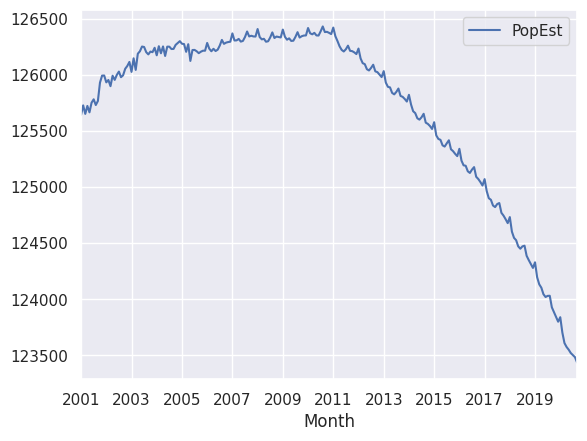

In [4]:
df.plot()


In [5]:
len(df)

237

In [6]:
# train data up to 2019
# test data 2019 and 9 months of 2020
end_train = len(df)-(12*1+9)
train_data = df.iloc[:end_train]
test_data = df.iloc[end_train:]

In [7]:
print(train_data.tail())
print(test_data.head())

            PopEst
Month             
2018-08-01  124477
2018-09-01  124387
2018-10-01  124349
2018-11-01  124315
2018-12-01  124279
            PopEst
Month             
2019-01-01  124329
2019-02-01  124196
2019-03-01  124133
2019-04-01  124103
2019-05-01  124045


In [8]:
# stepwise_fit = auto_arima(df['PopEst'], start_p=0, start_q=0,
#                           max_p=6, max_q=3, m=12,
#                           seasonal=True,
#                           d=None, trace=True,
#                           error_action='ignore',   # we don't want to know if an order does not work
#                           suppress_warnings=True,  # we don't want convergence warnings
#                           stepwise=True)           # set to stepwise

# stepwise_fit.summary()

### Check data for stationarity

### Decompose data using ETS

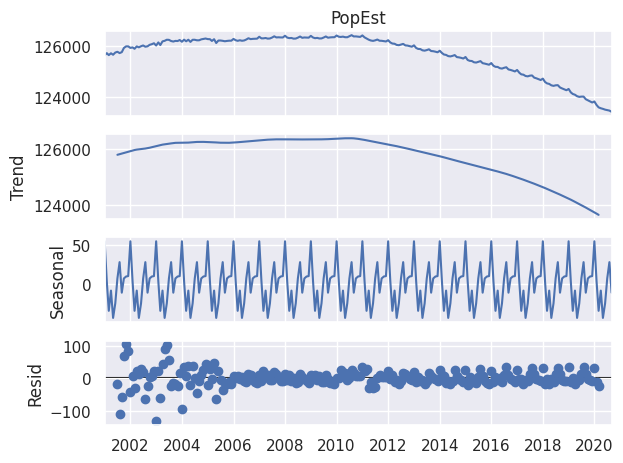

In [9]:
result = seasonal_decompose(df['PopEst'], model='add')
result.plot();

In [10]:
result.seasonal

Month
2001-01-01    54.430413
2001-02-01     3.404098
2001-03-01   -33.878797
2001-04-01    -8.208232
2001-05-01   -42.891102
                ...    
2020-05-01   -42.891102
2020-06-01   -24.340176
2020-07-01     7.182606
2020-08-01    27.943571
2020-09-01   -10.826166
Freq: MS, Name: seasonal, Length: 237, dtype: float64

<Axes: xlabel='Month'>

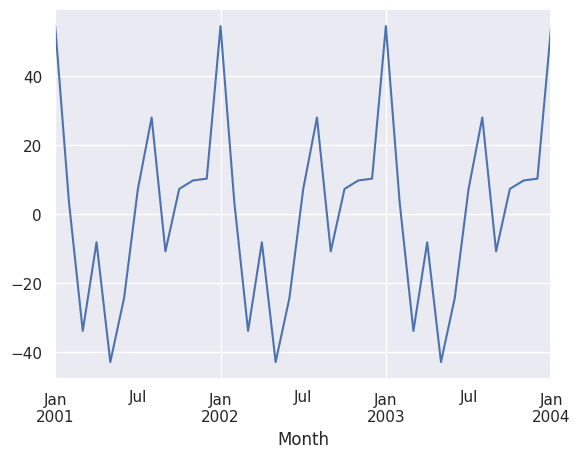

In [11]:

result.seasonal['2001-01-01':'2004-01-01'].plot()

### Run <tt>pmdarima.auto_arima</tt> to obtain recommended orders
This may take awhile as there are a lot more combinations to evaluate.

In [12]:
# For SARIMA Orders we set seasonal=True and pass in an m value 
# SARIMAX(1, 2, 1)x(1, 0, [], 12)	
# only train data SARIMAX(4, 2, 1)x(1, 0, [], 12)
auto_arima(train_data['PopEst'],seasonal=True,m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  216
Model:             SARIMAX(4, 2, 1)x(1, 0, [], 12)   Log Likelihood               -1049.029
Date:                             Thu, 20 Jul 2023   AIC                           2112.058
Time:                                     10:10:41   BIC                           2135.620
Sample:                                 01-01-2001   HQIC                          2121.579
                                      - 12-01-2018                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1159      0.043     -2.671      0.008      -0.201      -0.031
ar.L2          0.0331      0.048      0.688      0.492      -0.061       0.127
ar.L3         -0.0210      0.050     -0.417      0.677      -0.119       0.078
ar.L4         -0.0320      0.043     -0.752      0.452      -0.115       0.051
ma.L1         -0.9652      0.014    -68.729      0.000      -0.993      -0.938
ar.S.L12       0.7500      0.022     33.360      0.000       0.706       0.794
sigma2       604.5033     32.486     18.608      0.000     540.831     668.176
===================================================================================
Ljung-Box (L1) (Q):                   0.21   Jarque-Bera (JB):               563.07
Prob(Q):                              0.65   Prob(JB):                         0.00
Heteroskedasticity (H):               0.09   Skew:                            -1.04
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Fit a SARIMAX(1, 2, 1)x(1, 0, [], 12) Model

In [13]:
# model = SARIMAX(train_data['PopEst'],order=(1,2,1),seasonal_order=(1,0,[],12))
model = SARIMAX(train_data['PopEst'],order=(4, 2, 1),seasonal_order=(1, 0, [], 12))
results = model.fit()
results.summary()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.59813D+00    |proj g|=  8.34925D-01

At iterate    5    f=  5.18337D+00    |proj g|=  2.20384D-02

At iterate   10    f=  5.16143D+00    |proj g|=  7.21154D-02

At iterate   15    f=  4.98736D+00    |proj g|=  1.16517D-01

At iterate   20    f=  4.94625D+00    |proj g|=  1.96531D-02

At iterate   25    f=  4.89266D+00    |proj g|=  1.35498D-01

At iterate   30    f=  4.87487D+00    |proj g|=  1.53828D-03

At iterate   35    f=  4.87479D+00    |proj g|=  5.65443D-03

At iterate   40    f=  4.86899D+00    |proj g|=  7.59209D-02

At iterate   45    f=  4.85690D+00    |proj g|=  1.39261D-02

At iterate   50    f=  4.85662D+00    |proj g|=  5.12895D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/jupyter/notebooks/.venvs/tensor_venv/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                              PopEst   No. Observations:                  216
Model:             SARIMAX(4, 2, 1)x(1, 0, [], 12)   Log Likelihood               -1049.029
Date:                             Thu, 20 Jul 2023   AIC                           2112.058
Time:                                     10:10:42   BIC                           2135.620
Sample:                                 01-01-2001   HQIC                          2121.579
                                      - 12-01-2018                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1159      0.043     -2.671      0.008      -0.201      -0.031
ar.L2          0.0331      0.048      0.688      0.492      -0.061       0.127
ar.L3         -0.0210      0.050     -0.417      0.677      -0.119       0.078
ar.L4         -0.0320      0.043     -0.752      0.452      -0.115       0.051
ma.L1         -0.9652      0.014    -68.729      0.000      -0.993      -0.938
ar.S.L12       0.7500      0.022     33.360      0.000       0.706       0.794
sigma2       604.5033     32.486     18.608      0.000     540.831     668.176
===================================================================================
Ljung-Box (L1) (Q):                   0.21   Jarque-Bera (JB):               563.07
Prob(Q):                              0.65   Prob(JB):                         0.00
Heteroskedasticity (H):               0.09   Skew:                            -1.04
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

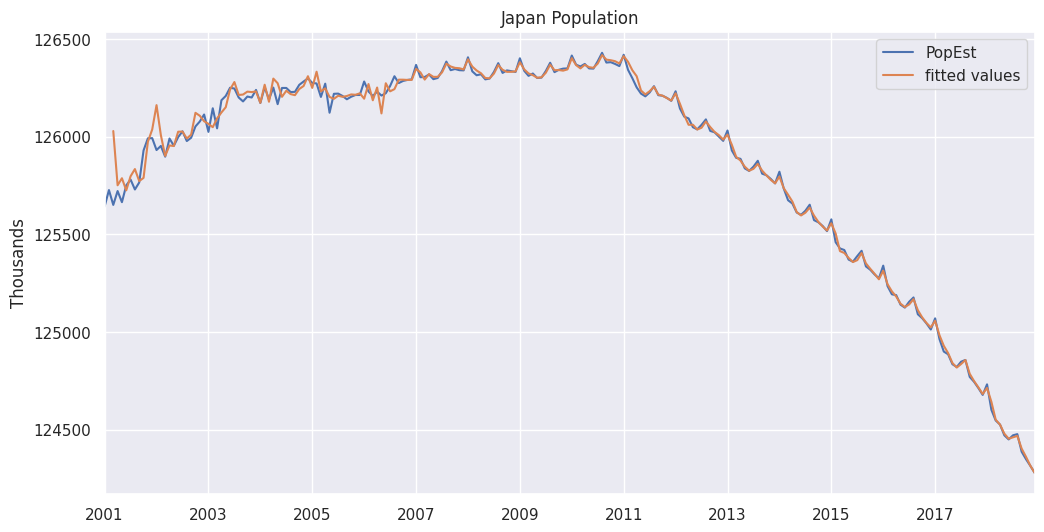

In [14]:

# Plot predictions against known values
title = 'Japan Population'
ylabel='Thousands'
xlabel=''

ax = train_data['PopEst'].plot(legend=True,figsize=(12,6),title=title)
results.fittedvalues[2:].plot(legend=True, label='fitted values')
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [15]:
# Obtain predicted values
start=len(train_data)
end=len(train_data)+len(test_data)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMAX(1, 2, 1)x(1, 0, [], 12) Predictions')

/jupyter/notebooks/.venvs/tensor_venv/lib/python3.8/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


#### store the start and end of test data index


In [16]:
# Compare predictions to expected values
for i in range(len(predictions)):
    print(f"predicted={predictions[i]:<11.10}, expected={test_data['PopEst'][i]}")

predicted=124310.7782, expected=124329
predicted=124204.0836, expected=124196
predicted=124153.424 , expected=124133
predicted=124128.2418, expected=124103
predicted=124077.5337, expected=124045
predicted=124052.3463, expected=124020
predicted=124058.6607, expected=124030
predicted=124053.7273, expected=124031
predicted=123976.7988, expected=123928
predicted=123938.867 , expected=123886
predicted=123903.935 , expected=123843
predicted=123867.503 , expected=123800
predicted=123881.9016, expected=123840
predicted=123792.4519, expected=123703
predicted=123745.026 , expected=123610
predicted=123716.7069, expected=123575
predicted=123669.2446, expected=123551
predicted=123640.9216, expected=123521
predicted=123636.2235, expected=123503
predicted=123623.0901, expected=123484
predicted=123555.9636, expected=123437


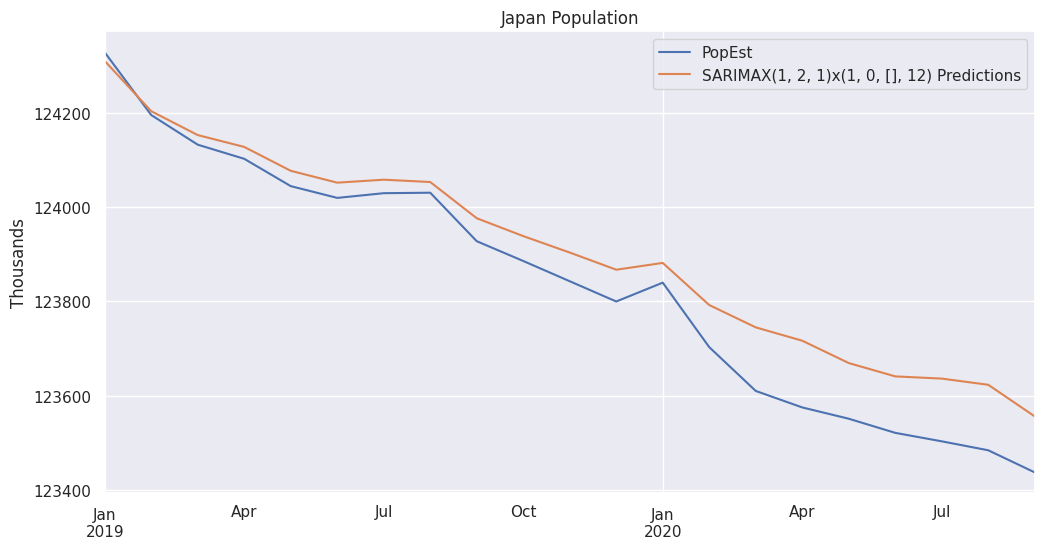

In [17]:
# Plot predictions against known values
title = 'Japan Population'
ylabel='Thousands'
xlabel=''

ax = test_data['PopEst'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

#### Evaluate the model

In [18]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test_data['PopEst'], predictions)
print(f'SARIMAX(1, 2, 1)x(1, 0, [], 12) MSE Error: {error:11.10}')

SARIMAX(1, 2, 1)x(1, 0, [], 12) MSE Error:  6953.35687


#### Test Error

In [19]:
from statsmodels.tools.eval_measures import rmse

error = rmse(test_data['PopEst'], predictions)
print(f'SARIMAX(1, 2, 1)x(1, 0, [], 12) RMSE Error: {error:11.10}')

SARIMAX(1, 2, 1)x(1, 0, [], 12) RMSE Error: 83.38679074


#### Training Error

In [20]:
# error with training data
error = rmse(train_data[2:]['PopEst'], results.fittedvalues[2:])
print(f'SARIMAX(1, 2, 1)x(1, 0, [], 12) RMSE Error: {error:11.10}')

SARIMAX(1, 2, 1)x(1, 0, [], 12) RMSE Error: 41.70710896


### Retrain the model on the whole data

In [21]:
# model = SARIMAX(df['PopEst'],order=(1, 2, 1),seasonal_order=(1, 0, [], 12))
model = SARIMAX(df['PopEst'],order=(4, 2, 1),seasonal_order=(1, 0, [], 12))
results = model.fit()
fcast = results.predict(len(df),len(df)+(12*5),typ='levels').rename('SARIMA(1, 2, 1)x(1, 0, [], 12) Forecast');

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.55336D+00    |proj g|=  7.67981D-01

At iterate    5    f=  5.16793D+00    |proj g|=  2.97275D-02

At iterate   10    f=  5.14550D+00    |proj g|=  6.58214D-02

At iterate   15    f=  4.92704D+00    |proj g|=  1.20536D-01


 This problem is unconstrained.



At iterate   20    f=  4.91466D+00    |proj g|=  7.69530D-03

At iterate   25    f=  4.85180D+00    |proj g|=  1.32279D-01



At iterate   30    f=  4.83624D+00    |proj g|=  1.69358D-03

At iterate   35    f=  4.83517D+00    |proj g|=  3.75907D-02

At iterate   40    f=  4.81718D+00    |proj g|=  1.02105D-02

At iterate   45    f=  4.81691D+00    |proj g|=  2.23125D-04

At iterate   50    f=  4.81690D+00    |proj g|=  1.05057D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     63      1     0     0   1.051D-04   4.817D+00
  F =   4.8169021937331920     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/jupyter/notebooks/.venvs/tensor_venv/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/jupyter/notebooks/.venvs/tensor_venv/lib/python3.8/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


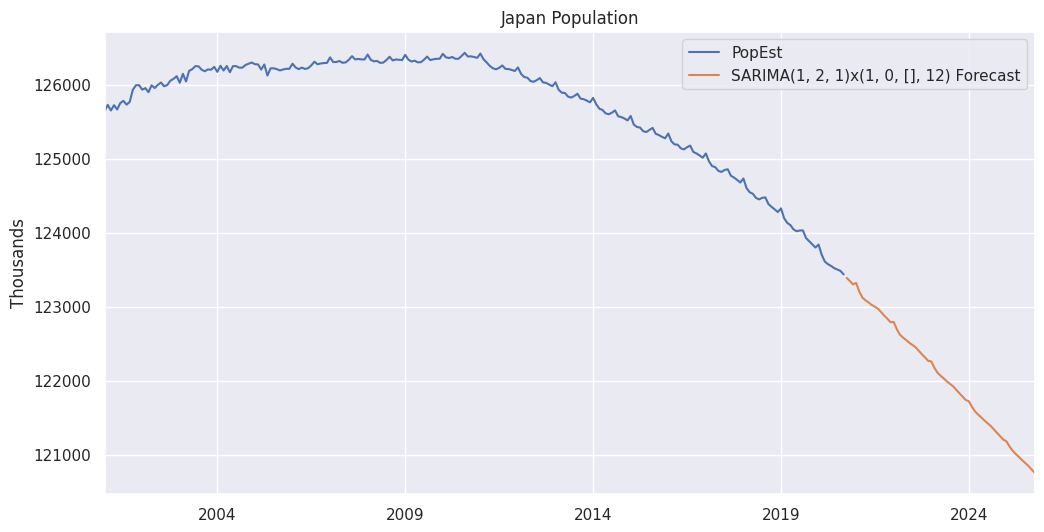

In [22]:
# Plot predictions against known values
title = 'Japan Population'
ylabel='Thousands'
xlabel=''

ax = df['PopEst'].plot(legend=True,figsize=(12,6),title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

## Let us try LSTM model

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense # for output layer
from tensorflow.keras.layers import LSTM

tf.keras.utils.set_random_seed(42)  # sets seeds for base-python, numpy and tf
tf.config.experimental.enable_op_determinism() # ensure reproducibility  even on GPU

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# test_data = test_data.drop('Predictions', axis=1)

2023-07-20 10:10:44.494353: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-20 10:10:45.449390: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [24]:
print(test_data.shape)
print(train_data.shape)


(21, 1)
(216, 1)


In [25]:
scaler = StandardScaler()
# scaler = MinMaxScaler()
scaler.fit(train_data)

StandardScaler()

In [26]:
scaled_train = scaler.transform(train_data)
scaled_test = scaler.transform(test_data)

In [27]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [28]:
# define generator
n_input = 3
n_features = 1
train_generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [29]:
len(scaled_train)

216

In [30]:
len(train_generator) # n_input = 3

213

In [31]:
# What does the first batch look like?
X,y = train_generator[0]
X.shape

(1, 3, 1)

In [32]:
X

array([[[-0.41346037],
        [-0.2621834 ],
        [-0.39905304]]])

In [33]:
y.shape

(1, 1)

In [34]:
y

array([[-0.27118798]])

In [35]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[-0.41346037 -0.2621834  -0.39905304]
Predict this y: 
 [[-0.27118798]]


In [36]:
# Let's redefine to get 12 months back and then predict the next month out
n_input = 12
n_features = 1
train_generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=12)

In [37]:
X,y = train_generator[0]

In [38]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[-0.41346037 -0.2621834  -0.39905304 -0.27118798 -0.37384021 -0.21896141
 -0.16493392 -0.25678065 -0.19194766  0.10340261  0.21505942  0.21686034
 -0.2621834  -0.39905304 -0.27118798 -0.37384021 -0.21896141 -0.16493392
 -0.25678065 -0.19194766  0.10340261  0.21505942  0.21686034  0.10700444
 -0.39905304 -0.27118798 -0.37384021 -0.21896141 -0.16493392 -0.25678065
 -0.19194766  0.10340261  0.21505942  0.21686034  0.10700444  0.14482369
 -0.27118798 -0.37384021 -0.21896141 -0.16493392 -0.25678065 -0.19194766
  0.10340261  0.21505942  0.21686034  0.10700444  0.14482369  0.04577329
 -0.37384021 -0.21896141 -0.16493392 -0.25678065 -0.19194766  0.10340261
  0.21505942  0.21686034  0.10700444  0.14482369  0.04577329  0.21325851
 -0.21896141 -0.16493392 -0.25678065 -0.19194766  0.10340261  0.21505942
  0.21686034  0.10700444  0.14482369  0.04577329  0.21325851  0.1466246
 -0.16493392 -0.25678065 -0.19194766  0.10340261  0.21505942  0.21686034
  0.10700444  0.14482369  0.045773

#### Hyperparameters

In [39]:
HIDDEN_LAYER_SIZE = 12
OUTPUT_SIZE = 1
EPOCHS = 200

#### Activation function between LSTM layers
* [as the output of LSTM cell is already activated, there is no need to add another activation function](https://datascience.stackexchange.com/questions/66594/activation-function-between-lstm-layers)
* However, by trying different settings, for this data, having an activation function relu will significantly improve the trained model

In [40]:
n_input

12

In [41]:
# define model
# what about flattening the input
model = Sequential()
model.add(LSTM(HIDDEN_LAYER_SIZE, return_sequences=False, activation='relu', input_shape=(n_input, n_features)))
# model.add(LSTM(HIDDEN_LAYER_SIZE, return_sequences=True, activation='relu'))
# model.add(LSTM(int(HIDDEN_LAYER_SIZE/2), activation='relu'))
model.add(Dense(1, activation='linear'))
# model.add(Dense(1))
# model = Sequential()
# model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
# model.add(Dense(1))
custom_optimizer = tf.keras.optimizers.legacy.Adam()
model.compile(optimizer=custom_optimizer, loss='mse')

2023-07-20 10:10:47.589118: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 16710 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB MIG 3g.20gb, pci bus id: 0000:92:00.0, compute capability: 8.0


In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 12)                672       
                                                                 
 dense (Dense)               (None, 1)                 13        
                                                                 
Total params: 685
Trainable params: 685
Non-trainable params: 0
_________________________________________________________________


In [43]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=6, restore_best_weights=True)

checkpoint = tf.keras.callbacks.ModelCheckpoint('best_model', 
                    monitor="loss", mode="min", 
                    save_best_only=True, verbose=1)

model.fit(train_generator,epochs=EPOCHS, callbacks=[early_stopping])
# mode_history = model.fit(x=train_generator, epochs=EPOCHS, use_multiprocessing=True, callbacks=[early_stopping, checkpoint])

2023-07-20 10:10:47.997115: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


Epoch 1/200


 7/17 [===========>..................] - ETA: 0s - loss: 0.8348

2023-07-20 10:10:49.906093: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


17/17 [==============================] - 2s 23ms/step - loss: 0.7326
Epoch 2/200
17/17 [==============================] - 0s 22ms/step - loss: 0.6214
Epoch 3/200
17/17 [==============================] - 0s 21ms/step - loss: 0.5030
Epoch 4/200
17/17 [==============================] - 0s 22ms/step - loss: 0.3807
Epoch 5/200
17/17 [==============================] - 0s 22ms/step - loss: 0.2366
Epoch 6/200
17/17 [==============================] - 0s 22ms/step - loss: 0.0874
Epoch 7/200
17/17 [==============================] - 0s 22ms/step - loss: 0.0285
Epoch 8/200
17/17 [==============================] - 0s 21ms/step - loss: 0.0219
Epoch 9/200
17/17 [==============================] - 0s 22ms/step - loss: 0.0211
Epoch 10/200
17/17 [==============================] - 0s 22ms/step - loss: 0.0249
Epoch 11/200
17/17 [==============================] - 0s 21ms/step - loss: 0.0201
Epoch 12/200
17/17 [==============================] - 0s 22ms/step - loss: 0.0180
Epoch 13/200
17/17 [=================

In [44]:
loss_per_epoch = model.history.history['loss']

Text(0, 0.5, 'Loss')

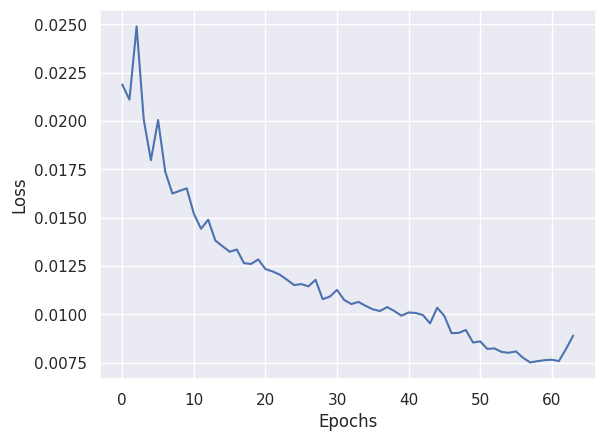

In [45]:
plt.plot(range(len(loss_per_epoch)-7),loss_per_epoch[7:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

### Evaluate on Test Data

In [46]:
first_eval_batch = scaled_train[-n_input:] # use last 12 rows of train data to predict the next 1 row
current_batch = first_eval_batch.reshape((1, n_input, n_features))

In [47]:
current_batch.shape

(1, 12, 1)

In [48]:
current_batch

array([[[-2.05409511],
        [-2.28821423],
        [-2.38726463],
        [-2.42508387],
        [-2.52413427],
        [-2.56195351],
        [-2.52413427],
        [-2.51332877],
        [-2.67541124],
        [-2.74384606],
        [-2.80507721],
        [-2.8699102 ]]])

Now let's put this logic in a for loop to predict into the future for the entire test range.

----

In [49]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test_data)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 185ms/step


2023-07-20 10:11:21.537844: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,12,1]
	 [[{{node Placeholder/_10}}]]
2023-07-20 10:11:21.538103: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,12,1]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 38ms/step


2023-07-20 10:11:21.757426: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,12,1]
	 [[{{node Placeholder/_10}}]]
2023-07-20 10:11:21.757678: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,12,1]
	 [[{{node Placeholder/_10}}]]
2023-07-20 10:11:21.827995: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape

2023-07-20 10:11:21.974042: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,12,1]
	 [[{{node Placeholder/_10}}]]
2023-07-20 10:11:21.974291: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,12,1]
	 [[{{node Placeholder/_10}}]]


1/1 [==============================] - 0s 36ms/step


2023-07-20 10:11:22.282980: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,12,1]
	 [[{{node Placeholder/_10}}]]
2023-07-20 10:11:22.283306: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,12,1]
	 [[{{node Placeholder/_10}}]]
2023-07-20 10:11:22.374810: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape

1/1 [==============================] - 0s 37ms/step


2023-07-20 10:11:22.532272: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,12,1]
	 [[{{node Placeholder/_10}}]]
2023-07-20 10:11:22.532525: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,12,1]
	 [[{{node Placeholder/_10}}]]
2023-07-20 10:11:22.607797: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape

1/1 [==============================] - 0s 33ms/step


2023-07-20 10:11:22.754190: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,12,1]
	 [[{{node Placeholder/_10}}]]
2023-07-20 10:11:22.754444: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,12,1]
	 [[{{node Placeholder/_10}}]]
2023-07-20 10:11:22.826727: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape

1/1 [==============================] - 0s 37ms/step


2023-07-20 10:11:22.967452: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,12,1]
	 [[{{node Placeholder/_10}}]]
2023-07-20 10:11:22.967700: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,12,1]
	 [[{{node Placeholder/_10}}]]
2023-07-20 10:11:23.041201: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape

1/1 [==============================] - 0s 35ms/step


2023-07-20 10:11:23.195789: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,12,1]
	 [[{{node Placeholder/_10}}]]
2023-07-20 10:11:23.196060: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,12,1]
	 [[{{node Placeholder/_10}}]]
2023-07-20 10:11:23.265133: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape

1/1 [==============================] - 0s 35ms/step


2023-07-20 10:11:23.403756: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,12,1]
	 [[{{node Placeholder/_10}}]]
2023-07-20 10:11:23.404020: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,12,1]
	 [[{{node Placeholder/_10}}]]


In [50]:
test_predictions

[array([-2.9503753], dtype=float32),
 array([-3.0282958], dtype=float32),
 array([-3.0944831], dtype=float32),
 array([-3.1582887], dtype=float32),
 array([-3.2250104], dtype=float32),
 array([-3.2902665], dtype=float32),
 array([-3.3619273], dtype=float32),
 array([-3.443876], dtype=float32),
 array([-3.5314846], dtype=float32),
 array([-3.6096752], dtype=float32),
 array([-3.6874099], dtype=float32),
 array([-3.768561], dtype=float32),
 array([-3.8507705], dtype=float32),
 array([-3.9335284], dtype=float32),
 array([-4.016025], dtype=float32),
 array([-4.099854], dtype=float32),
 array([-4.18629], dtype=float32),
 array([-4.2727246], dtype=float32),
 array([-4.361685], dtype=float32),
 array([-4.45332], dtype=float32),
 array([-4.5439053], dtype=float32)]

In [51]:
scaled_test

array([[-2.77986438],
       [-3.01938625],
       [-3.13284398],
       [-3.18687147],
       [-3.29132461],
       [-3.33634752],
       [-3.31833836],
       [-3.31653744],
       [-3.50203182],
       [-3.5776703 ],
       [-3.6551097 ],
       [-3.7325491 ],
       [-3.66051245],
       [-3.90723799],
       [-4.0747232 ],
       [-4.13775527],
       [-4.18097726],
       [-4.23500475],
       [-4.26742125],
       [-4.30163866],
       [-4.38628172]])

#### Inverse Transformations and Compare

In [52]:
test_predictions

[array([-2.9503753], dtype=float32),
 array([-3.0282958], dtype=float32),
 array([-3.0944831], dtype=float32),
 array([-3.1582887], dtype=float32),
 array([-3.2250104], dtype=float32),
 array([-3.2902665], dtype=float32),
 array([-3.3619273], dtype=float32),
 array([-3.443876], dtype=float32),
 array([-3.5314846], dtype=float32),
 array([-3.6096752], dtype=float32),
 array([-3.6874099], dtype=float32),
 array([-3.768561], dtype=float32),
 array([-3.8507705], dtype=float32),
 array([-3.9335284], dtype=float32),
 array([-4.016025], dtype=float32),
 array([-4.099854], dtype=float32),
 array([-4.18629], dtype=float32),
 array([-4.2727246], dtype=float32),
 array([-4.361685], dtype=float32),
 array([-4.45332], dtype=float32),
 array([-4.5439053], dtype=float32)]

In [53]:
true_predictions = scaler.inverse_transform(test_predictions)
true_predictions

array([[124234.31989984],
       [124191.05279357],
       [124154.30073475],
       [124118.87122578],
       [124081.82248685],
       [124045.5875331 ],
       [124005.79625734],
       [123960.292334  ],
       [123911.64566681],
       [123868.22856565],
       [123825.06458915],
       [123780.00363397],
       [123734.35487885],
       [123688.40163277],
       [123642.59348325],
       [123596.04555309],
       [123548.05009939],
       [123500.05517523],
       [123450.65800401],
       [123399.77544646],
       [123349.4759229 ]])

In [54]:
test_data_pred = test_data.copy()
test_data_pred['Predictions'] = true_predictions

In [55]:
test_data_pred

,PopEst,Predictions
Month,,
2019-01-01,124329,124234.319900
2019-02-01,124196,124191.052794
2019-03-01,124133,124154.300735
2019-04-01,124103,124118.871226
2019-05-01,124045,124081.822487
2019-06-01,124020,124045.587533
2019-07-01,124030,124005.796257
2019-08-01,124031,123960.292334
2019-09-01,123928,123911.645667


<Axes: xlabel='Month'>

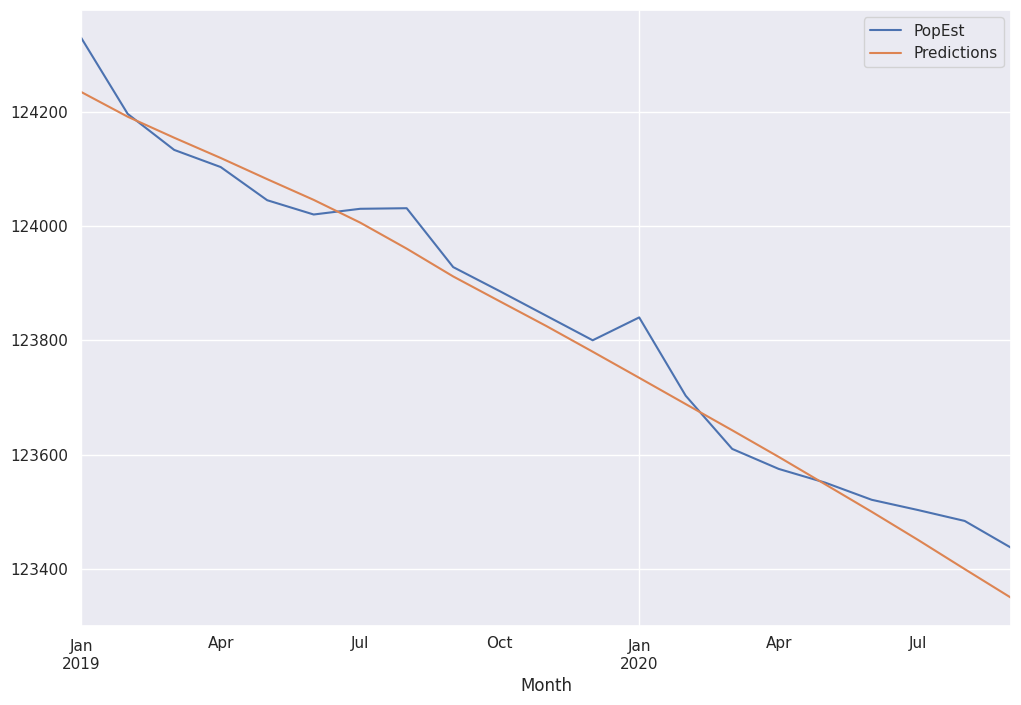

In [56]:
test_data_pred.plot(figsize=(12,8))

In [57]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(y_true=test_data_pred['PopEst'], y_pred=test_data_pred['Predictions'])
print(f'RMSE = {np.sqrt(error)}')
# patience=3, RMSE = 191.25
# patience=6, RMSE = 48.51
# SARIMA RMSE 

RMSE = 48.509112375922975


### predict fot the next 5 years

In [58]:

test_data_pred2 = test_data_pred.drop(['PopEst'], axis=1).copy()

# test_data_pred2['Predictions'] = scaler.inverse_transform(test_predictions)

end_date = pd.to_datetime('2020-09-01')

# Generate a new range of dates for the next 100 months
new_dates = pd.date_range(end_date + pd.DateOffset(months=1), periods=12*5, freq='MS')

# Create a new dataframe with zeros for the values
new_data = pd.DataFrame(0, index=new_dates, columns=test_data_pred2.columns)

# Append the new dataframe to the existing dataframe
test_data_pred2 = pd.concat([test_data_pred2, new_data])

# Sort the dataframe by the index (date)
test_data_pred2 = test_data_pred2.sort_index()

In [59]:
test_data_pred2

,Predictions
2019-01-01,124234.319900
2019-02-01,124191.052794
2019-03-01,124154.300735
2019-04-01,124118.871226
2019-05-01,124081.822487
...,...
2025-05-01,0.000000
2025-06-01,0.000000
2025-07-01,0.000000
2025-08-01,0.000000


In [60]:
test_data_pred2[9:21]

,Predictions
2019-10-01,123868.228566
2019-11-01,123825.064589
2019-12-01,123780.003634
2020-01-01,123734.354879
2020-02-01,123688.401633
2020-03-01,123642.593483
2020-04-01,123596.045553
2020-05-01,123548.050099
2020-06-01,123500.055175
2020-07-01,123450.658004


In [61]:
future_test_predictions = []

first_future_batch = np.array(test_predictions)[-12:]
current_batch = first_future_batch.reshape((1, n_input, n_features))

for i in range(12*5):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    future_test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 34ms/step


2023-07-20 10:11:23.978402: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,12,1]
	 [[{{node Placeholder/_10}}]]
2023-07-20 10:11:23.978655: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,12,1]
	 [[{{node Placeholder/_10}}]]
2023-07-20 10:11:24.045568: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape

1/1 [==============================] - 0s 40ms/step


2023-07-20 10:11:24.183800: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,12,1]
	 [[{{node Placeholder/_10}}]]
2023-07-20 10:11:24.184057: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,12,1]
	 [[{{node Placeholder/_10}}]]
2023-07-20 10:11:24.256297: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape

1/1 [==============================] - 0s 38ms/step


2023-07-20 10:11:24.408423: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,12,1]
	 [[{{node Placeholder/_10}}]]
2023-07-20 10:11:24.408667: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,12,1]
	 [[{{node Placeholder/_10}}]]
2023-07-20 10:11:24.488223: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape

1/1 [==============================] - 0s 36ms/step


2023-07-20 10:11:24.765475: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,12,1]
	 [[{{node Placeholder/_10}}]]
2023-07-20 10:11:24.765810: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,12,1]
	 [[{{node Placeholder/_10}}]]
2023-07-20 10:11:24.855026: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape

1/1 [==============================] - 0s 33ms/step


2023-07-20 10:11:25.001435: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,12,1]
	 [[{{node Placeholder/_10}}]]
2023-07-20 10:11:25.001686: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,12,1]
	 [[{{node Placeholder/_10}}]]
2023-07-20 10:11:25.072446: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape

1/1 [==============================] - 0s 40ms/step


2023-07-20 10:11:25.214904: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,12,1]
	 [[{{node Placeholder/_10}}]]
2023-07-20 10:11:25.215153: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,12,1]
	 [[{{node Placeholder/_10}}]]
2023-07-20 10:11:25.285703: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape

1/1 [==============================] - 0s 38ms/step


2023-07-20 10:11:25.443994: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,12,1]
	 [[{{node Placeholder/_10}}]]
2023-07-20 10:11:25.444246: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,12,1]
	 [[{{node Placeholder/_10}}]]
2023-07-20 10:11:25.513901: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape

1/1 [==============================] - 0s 34ms/step


2023-07-20 10:11:25.666014: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,12,1]
	 [[{{node Placeholder/_10}}]]
2023-07-20 10:11:25.666260: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,12,1]
	 [[{{node Placeholder/_10}}]]
2023-07-20 10:11:25.739664: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape

1/1 [==============================] - 0s 34ms/step


2023-07-20 10:11:25.882500: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,12,1]
	 [[{{node Placeholder/_10}}]]
2023-07-20 10:11:25.882747: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,12,1]
	 [[{{node Placeholder/_10}}]]
2023-07-20 10:11:25.955826: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape

1/1 [==============================] - 0s 34ms/step


2023-07-20 10:11:26.104403: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,12,1]
	 [[{{node Placeholder/_10}}]]
2023-07-20 10:11:26.104655: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,12,1]
	 [[{{node Placeholder/_10}}]]
2023-07-20 10:11:26.176245: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape

1/1 [==============================] - 0s 39ms/step


2023-07-20 10:11:26.315947: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,12,1]
	 [[{{node Placeholder/_10}}]]
2023-07-20 10:11:26.316196: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,12,1]
	 [[{{node Placeholder/_10}}]]
2023-07-20 10:11:26.386011: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape

1/1 [==============================] - 0s 34ms/step


2023-07-20 10:11:26.532137: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,12,1]
	 [[{{node Placeholder/_10}}]]
2023-07-20 10:11:26.532385: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,12,1]
	 [[{{node Placeholder/_10}}]]
2023-07-20 10:11:26.609020: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape

1/1 [==============================] - 0s 41ms/step


2023-07-20 10:11:26.771924: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,12,1]
	 [[{{node Placeholder/_10}}]]
2023-07-20 10:11:26.772188: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,12,1]
	 [[{{node Placeholder/_10}}]]
2023-07-20 10:11:26.861923: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape

1/1 [==============================] - ETA: 0s

2023-07-20 10:11:27.248571: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,12,1]
	 [[{{node Placeholder/_10}}]]
2023-07-20 10:11:27.248903: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,12,1]
	 [[{{node Placeholder/_10}}]]
2023-07-20 10:11:27.342201: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape

1/1 [==============================] - 0s 34ms/step


2023-07-20 10:11:27.495889: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,12,1]
	 [[{{node Placeholder/_10}}]]
2023-07-20 10:11:27.496148: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,12,1]
	 [[{{node Placeholder/_10}}]]
2023-07-20 10:11:27.567703: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape

1/1 [==============================] - 0s 33ms/step


2023-07-20 10:11:27.724622: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,12,1]
	 [[{{node Placeholder/_10}}]]
2023-07-20 10:11:27.724875: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,12,1]
	 [[{{node Placeholder/_10}}]]
2023-07-20 10:11:27.792633: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape

1/1 [==============================] - 0s 34ms/step


2023-07-20 10:11:27.937855: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,12,1]
	 [[{{node Placeholder/_10}}]]
2023-07-20 10:11:27.938100: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,12,1]
	 [[{{node Placeholder/_10}}]]
2023-07-20 10:11:28.009041: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape

1/1 [==============================] - 0s 37ms/step


2023-07-20 10:11:28.150018: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,12,1]
	 [[{{node Placeholder/_10}}]]
2023-07-20 10:11:28.150275: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,12,1]
	 [[{{node Placeholder/_10}}]]
2023-07-20 10:11:28.220437: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape

1/1 [==============================] - 0s 34ms/step


2023-07-20 10:11:28.377927: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,12,1]
	 [[{{node Placeholder/_10}}]]
2023-07-20 10:11:28.378187: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,12,1]
	 [[{{node Placeholder/_10}}]]
2023-07-20 10:11:28.454970: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape

1/1 [==============================] - 0s 37ms/step


2023-07-20 10:11:28.600671: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,12,1]
	 [[{{node Placeholder/_10}}]]
2023-07-20 10:11:28.600970: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,12,1]
	 [[{{node Placeholder/_10}}]]
2023-07-20 10:11:28.667744: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape

1/1 [==============================] - 0s 37ms/step


2023-07-20 10:11:28.820279: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,12,1]
	 [[{{node Placeholder/_10}}]]
2023-07-20 10:11:28.820533: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1,12,1]
	 [[{{node Placeholder/_10}}]]


In [62]:
len(future_test_predictions)

60

In [63]:
scaler.inverse_transform(future_test_predictions)
x = pd.DataFrame(data=scaler.inverse_transform(future_test_predictions), columns=['p'])


In [64]:
x[:12]

,p
0,123298.701129
1,123248.211232
2,123197.395927
3,123145.747641
4,123093.784008
5,123041.373700
6,122988.241087
7,122935.304672
8,122882.719877
9,122827.571004


In [65]:
x.describe()

,p
count,60.000000
mean,121552.180617
std,1100.783356
min,119659.971674
25%,120614.694870
50%,121607.749639
75%,122504.338163
max,123298.701129


In [66]:
test_data_pred2.shape

(81, 1)

In [67]:
test_data_pred2[21:] = scaler.inverse_transform(future_test_predictions)

<Axes: >

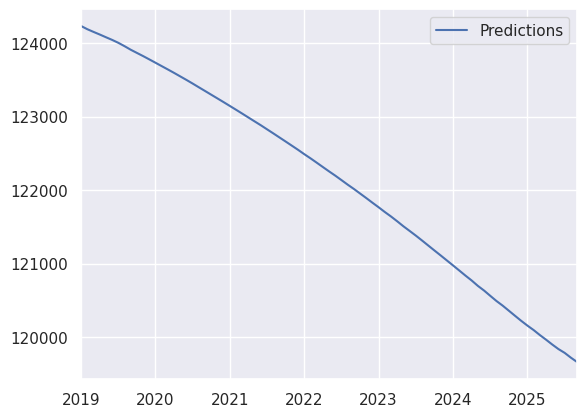

In [68]:
test_data_pred2.plot()

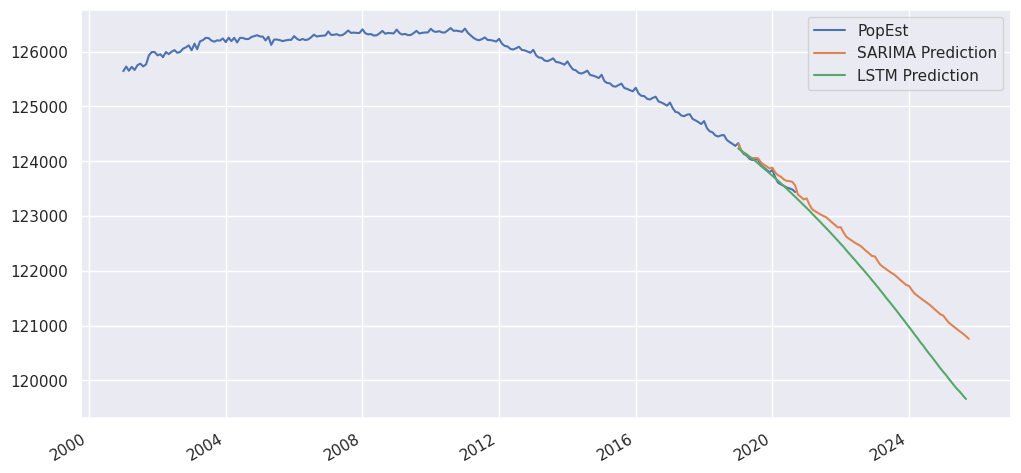

In [69]:
plt.figure(figsize=(12, 6))
# Plotting the first dataframe
plt.plot(df.index, df['PopEst'], label='PopEst')

# Plotting the second dataframe
# plt.plot(test_data_pred2.index, test_data_pred2['PopEst'], label='Future Prediction LSTM')

# fcast.plot(legend=True)
pd.concat([predictions, fcast], axis=0).plot(legend=True, label='SARIMA Prediction')
pd.Series(test_data_pred2['Predictions']).plot(legend=True, label='LSTM Prediction')

plt.legend()


<Axes: xlabel='Month'>

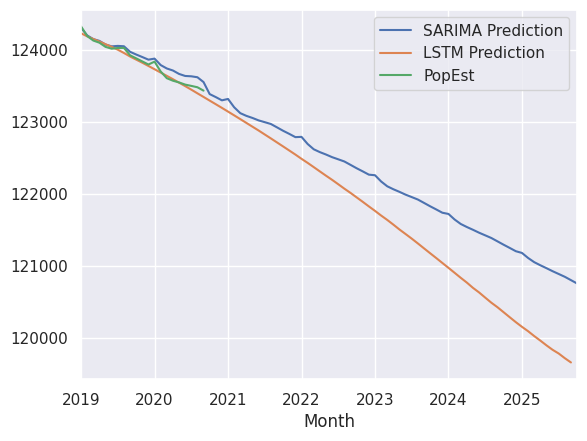

In [70]:
pd.concat([predictions, fcast], axis=0).plot(legend=True, label='SARIMA Prediction')
pd.Series(test_data_pred2['Predictions']).plot(legend=True, label='LSTM Prediction')
pd.Series(test_data['PopEst']).plot(legend=True, label='PopEst')